In [27]:
# ML PROJECT

# Project:-  Predicting Suicide Rates_ A Comparative Analysis Across Countries


**Project Objective:**

The objective of this project is to analyze and predict suicide rates across different countries using machine learning techniques. By leveraging machine learning, this project seeks to offer data-driven insights into suicide trends, enabling policymakers, researchers, and health organizations to take proactive measures in suicide prevention across different countries.

**Problem Statement:**

### **Problem Statement:**  

Suicide is a major public health concern that affects individuals across various demographics and regions. Understanding the factors influencing suicide rates is crucial for implementing effective prevention strategies. However, due to the complexity of socio-economic, psychological, and environmental factors, accurately predicting suicide trends remains a challenge.  

This project aims to develop a machine learning-based predictive model that can analyze historical suicide data across different countries and identify key patterns influencing suicide rates. By utilizing advanced data analytics and machine learning techniques, this study seeks to provide actionable insights that can assist policymakers and mental health professionals in formulating data-driven interventions to reduce suicide rates globally.

About this file

Explanation of Column Names
Here's a breakdown of what each column represents:

Country:

This column simply lists the name of the country.
Suicide Rate Both Sexes Rate Per 100k in 2021:

This column shows the number of suicides per 100,000 people for both males and females in the year 2021.
Suicide Rate Male Rate Per 100k in 2021:

This column shows the number of suicides per 100,000 males in the year 2021.
Suicide Rate Female Rate Per 100k in 2021:

This column shows the number of suicides per 100,000 females in the year 2021.
Suicide Rate Both Sexes Rate Per 100k in 2020:

This column shows the number of suicides per 100,000 people for both males and females in the year 2020.
Suicide Rate Male Rate Per 100k in 2020:

This column shows the number of suicides per 100,000 males in the year 2020.
Suicide Rate Female Rate Per 100k in 2020:

This column shows the number of suicides per 100,000 females in the year 2020.
Suicide Rate Both Sexes Rate Per 100k in 2019:

This column shows the number of suicides per 100,000 people for both males and females in the year 2019.
Suicide Rate Male Rate Per 100k in 2019:

This column shows the number of suicides per 100,000 males in the year 2019.
Suicide Rate Female Rate Per 100k in 2019:

This column shows the number of suicides per 100,000 females in the year 2019.


#### About Dataset
The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system .

**Total no. of attributes**: 10

**No .of instances**: 204


### In Brief, Project Aims to:

###Develop a Predictive Model:

Create a machine learning model that accurately predicts the suicide rates across different countries.

### Identify Key Risk Factors:

Analyze which lifestyle choices and features data that most significantly contribute to suicide rates , aiding in early detection efforts.

### Enhance Early Diagnosis:
Provide a tool that can assist healthcare professionals in identifying high-risk individuals for further screening and preventive care.

### Provide Insightful Data Analysis:
Perform exploratory data analysis to visualize trends and correlations within the dataset, revealing impactful factors related to suicide rates .

### Optimize Model Performance:
 Experiment with multiple classification algorithms and hyperparameter tuning to achieve high predictive accuracy, focusing on metrics like R2square, MeanSquaredError,  and MeanAbsoluteError.

### Build an Accessible Application :
Implement a user-friendly interface (e.g., using Streamlit) to allow users to input  data and receive  suicide rates across country.

In [28]:
# importing important Library
import pandas as pd         
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, KFold,StratifiedKFold,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score
import streamlit as st
import joblib
import warnings
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv(r"C:\Users\shivam srivastava\Downloads\suicide-rate-by-country-2024.csv")   # load data

In [30]:
df.head()   # display top 5 rows

,country,SuicideRate_BothSexes_RatePer100k_2021,SuicideRate_Male_RatePer100k_2021,SuicideRate_Female_RatePer100k_2021,SuicideRate_BothSexes_RatePer100k_2020,SuicideRate_Male_RatePer100k_2020,SuicideRate_Female_RatePer100k_2020,SuicideRate_BothSexes_RatePer100k_2019,SuicideRate_Male_RatePer100k_2019,SuicideRate_Female_RatePer100k_2019
0,India,13.33,15.70,10.85,13.28,15.70,10.73,12.7,14.1,11.1
1,China,9.17,10.64,7.63,9.04,10.52,7.50,8.1,9.8,6.2
2,United States,15.25,24.13,6.66,15.38,24.33,6.73,16.1,25.0,7.5
3,Indonesia,1.64,2.21,1.05,1.66,2.23,1.07,2.4,3.7,1.1
4,Pakistan,5.82,8.46,3.05,5.89,8.54,3.10,8.9,13.3,4.3


In [31]:
df.shape   # size of data set

(204, 10)

In [32]:
df.isnull().sum()     # checking null values

country                                    0
SuicideRate_BothSexes_RatePer100k_2021     0
SuicideRate_Male_RatePer100k_2021          0
SuicideRate_Female_RatePer100k_2021        0
SuicideRate_BothSexes_RatePer100k_2020     0
SuicideRate_Male_RatePer100k_2020          0
SuicideRate_Female_RatePer100k_2020        0
SuicideRate_BothSexes_RatePer100k_2019    21
SuicideRate_Male_RatePer100k_2019         22
SuicideRate_Female_RatePer100k_2019       21
dtype: int64

In [33]:
df.dtypes            # dataTypes

country                                    object
SuicideRate_BothSexes_RatePer100k_2021    float64
SuicideRate_Male_RatePer100k_2021         float64
SuicideRate_Female_RatePer100k_2021       float64
SuicideRate_BothSexes_RatePer100k_2020    float64
SuicideRate_Male_RatePer100k_2020         float64
SuicideRate_Female_RatePer100k_2020       float64
SuicideRate_BothSexes_RatePer100k_2019    float64
SuicideRate_Male_RatePer100k_2019         float64
SuicideRate_Female_RatePer100k_2019       float64
dtype: object

In [34]:
df.info()            # information about datatype and null vales for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 204 non-null    object 
 1   SuicideRate_BothSexes_RatePer100k_2021  204 non-null    float64
 2   SuicideRate_Male_RatePer100k_2021       204 non-null    float64
 3   SuicideRate_Female_RatePer100k_2021     204 non-null    float64
 4   SuicideRate_BothSexes_RatePer100k_2020  204 non-null    float64
 5   SuicideRate_Male_RatePer100k_2020       204 non-null    float64
 6   SuicideRate_Female_RatePer100k_2020     204 non-null    float64
 7   SuicideRate_BothSexes_RatePer100k_2019  183 non-null    float64
 8   SuicideRate_Male_RatePer100k_2019       182 non-null    float64
 9   SuicideRate_Female_RatePer100k_2019     183 non-null    float64
dtypes: float64(9), object(1)
memory usage: 16.1+ KB


In [35]:
df.describe()    # description about data

,SuicideRate_BothSexes_RatePer100k_2021,SuicideRate_Male_RatePer100k_2021,SuicideRate_Female_RatePer100k_2021,SuicideRate_BothSexes_RatePer100k_2020,SuicideRate_Male_RatePer100k_2020,SuicideRate_Female_RatePer100k_2020,SuicideRate_BothSexes_RatePer100k_2019,SuicideRate_Male_RatePer100k_2019,SuicideRate_Female_RatePer100k_2019
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,183.000000,182.000000,183.000000
mean,9.525931,14.802304,4.358284,13.669951,14.922108,4.400539,9.455191,14.732418,4.350820
std,6.802563,10.840661,3.311081,58.351062,11.127588,3.402186,7.989620,13.108952,3.531769
min,0.780000,1.180000,0.300000,0.770000,1.180000,0.290000,0.400000,0.600000,0.300000
25%,5.090000,7.577500,2.262500,5.075000,7.500000,2.282500,4.600000,6.825000,2.000000
50%,7.885000,12.205000,3.540000,8.015000,12.410000,3.520000,7.500000,11.350000,3.300000
75%,12.912500,19.857500,5.785000,13.037500,19.897500,5.900000,11.850000,17.975000,6.050000
max,59.620000,86.960000,29.400000,837.000000,94.390000,31.590000,72.400000,116.000000,30.100000


# Step 1. Data Preprocessing:

In [36]:
# Data Cleaning - Handle missing values
df['SuicideRate_BothSexes_RatePer100k_2019']=df['SuicideRate_BothSexes_RatePer100k_2019'].fillna(df['SuicideRate_BothSexes_RatePer100k_2019'].median())

df['SuicideRate_Male_RatePer100k_2019']=df['SuicideRate_Male_RatePer100k_2019'].fillna(df['SuicideRate_Male_RatePer100k_2019'].median())

df['SuicideRate_Female_RatePer100k_2019']=df['SuicideRate_Female_RatePer100k_2019'].fillna(df['SuicideRate_Female_RatePer100k_2019'].median())

In [37]:
df.isnull().sum()


country                                   0
SuicideRate_BothSexes_RatePer100k_2021    0
SuicideRate_Male_RatePer100k_2021         0
SuicideRate_Female_RatePer100k_2021       0
SuicideRate_BothSexes_RatePer100k_2020    0
SuicideRate_Male_RatePer100k_2020         0
SuicideRate_Female_RatePer100k_2020       0
SuicideRate_BothSexes_RatePer100k_2019    0
SuicideRate_Male_RatePer100k_2019         0
SuicideRate_Female_RatePer100k_2019       0
dtype: int64

In [38]:
df1=df.copy()
df=df.drop(columns='SuicideRate_Male_RatePer100k_2021')
df=df.drop(columns='SuicideRate_Female_RatePer100k_2021')

In [39]:
categorical=df.select_dtypes(include='object').columns.to_list()    # categorical columns
categorical

['country']

In [40]:
numerical=df.select_dtypes(include=('int64','float64')).columns.to_list()   # numerical columns
numerical

['SuicideRate_BothSexes_RatePer100k_2021',
 'SuicideRate_BothSexes_RatePer100k_2020',
 'SuicideRate_Male_RatePer100k_2020',
 'SuicideRate_Female_RatePer100k_2020',
 'SuicideRate_BothSexes_RatePer100k_2019',
 'SuicideRate_Male_RatePer100k_2019',
 'SuicideRate_Female_RatePer100k_2019']

# Feature Engineering - Year-over-year change

In [41]:
# Feature Engineering - Year-over-year change
df['YoY Change 2020'] = df['SuicideRate_BothSexes_RatePer100k_2020'] - df['SuicideRate_BothSexes_RatePer100k_2019']
df['YoY Change 2021'] = df['SuicideRate_BothSexes_RatePer100k_2021'] - df['SuicideRate_BothSexes_RatePer100k_2020']



In [42]:
# Select features and target

target = 'SuicideRate_BothSexes_RatePer100k_2021'

# Split data

X = df.drop(columns=[target])
y = df[target]


In [43]:
# Separate categorical and numerical features

categorical = X.select_dtypes(include='object').columns.to_list()

numerical = X.select_dtypes(include=('int64', 'float64')).columns.to_list()

In [44]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scaling and Encoding

In [45]:
# Preprocessing: Scaling numerical data and encoding categorical data
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Fit and transform numerical data
x_train_scaled = scaler.fit_transform(X_train[numerical])
x_test_scaled = scaler.transform(X_test[numerical])

# Transform categorical data
x_train_encoded = encoder.fit_transform(X_train[categorical])
x_test_encoded = encoder.transform(X_test[categorical])


In [46]:

# Combine the scaled numerical features with encoded categorical features
x_train_final = np.hstack([x_train_scaled, x_train_encoded])
x_test_final = np.hstack([x_test_scaled, x_test_encoded])

In [47]:

# Train the model
model1 = LinearRegression()
model1.fit(x_train_final, y_train)

LinearRegression()

In [48]:
# Train Random Forest model
model1 = LinearRegression()
model1.fit(x_train_final, y_train)

# Model Evaluation
y_pred = model1.predict(x_test_final)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MAE: 0.3288883874904706
MSE: 0.36162345013109903
R-squared: 0.9950190141653368


# Step 2. Exploratory Data Analysis(EDA)

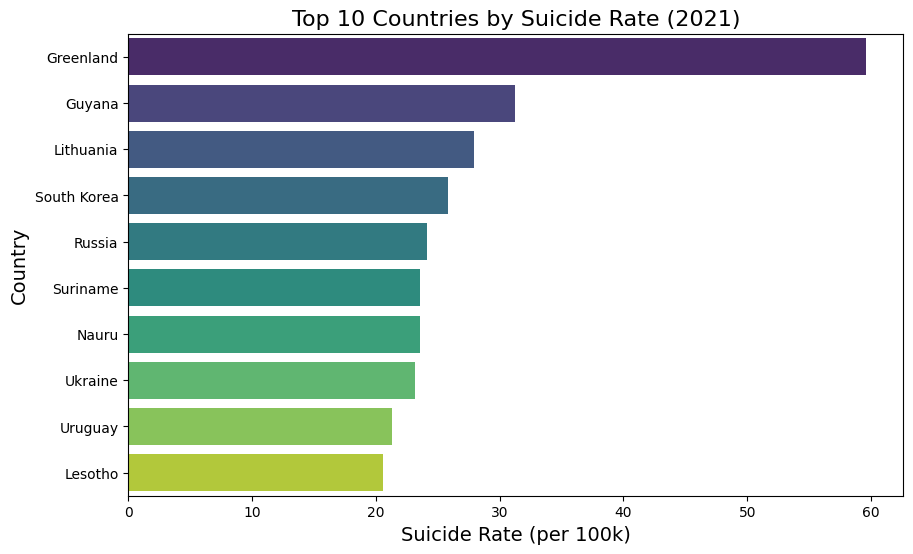

In [49]:
# Top 10 countries by suicide rate for 2021 for both_sexes

top_10_countries = df[['country', 'SuicideRate_BothSexes_RatePer100k_2021']].nlargest(10, 'SuicideRate_BothSexes_RatePer100k_2021')

plt.figure(figsize=(10, 6))
sns.barplot(x='SuicideRate_BothSexes_RatePer100k_2021', y='country', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries by Suicide Rate (2021)',fontsize = 16)
plt.xlabel('Suicide Rate (per 100k)',fontsize = 14)
plt.ylabel('Country',fontsize = 14)
plt.show()

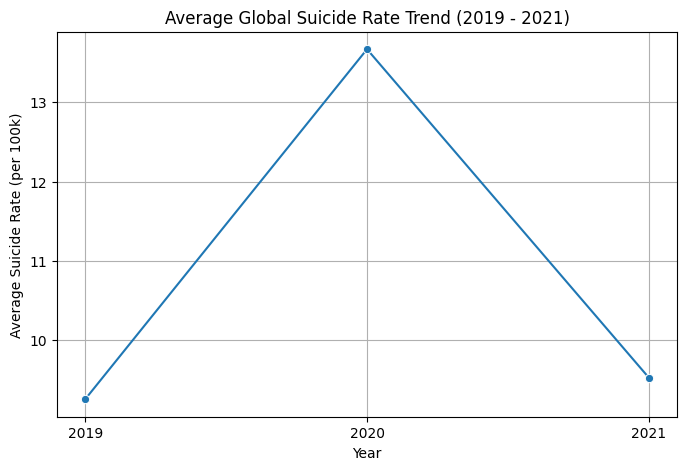

In [50]:
avg_rates = df[['SuicideRate_BothSexes_RatePer100k_2019', 'SuicideRate_BothSexes_RatePer100k_2020', 'SuicideRate_BothSexes_RatePer100k_2021']].mean().reset_index()
avg_rates.columns = ['Year', 'Average_Suicide_Rate']
avg_rates['Year'] = avg_rates['Year'].str.extract('(\d{4})')    #  used to extract matching patterns using regex and  matches a 4-digit number like 1999, 2023

plt.figure(figsize=(8, 5))
sns.lineplot(x='Year', y='Average_Suicide_Rate', data=avg_rates, marker='o')
plt.title('Average Global Suicide Rate Trend (2019 - 2021)')
plt.ylabel('Average Suicide Rate (per 100k)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

Result:- suicide Rate is higher in 2020 than 2019 and 2021

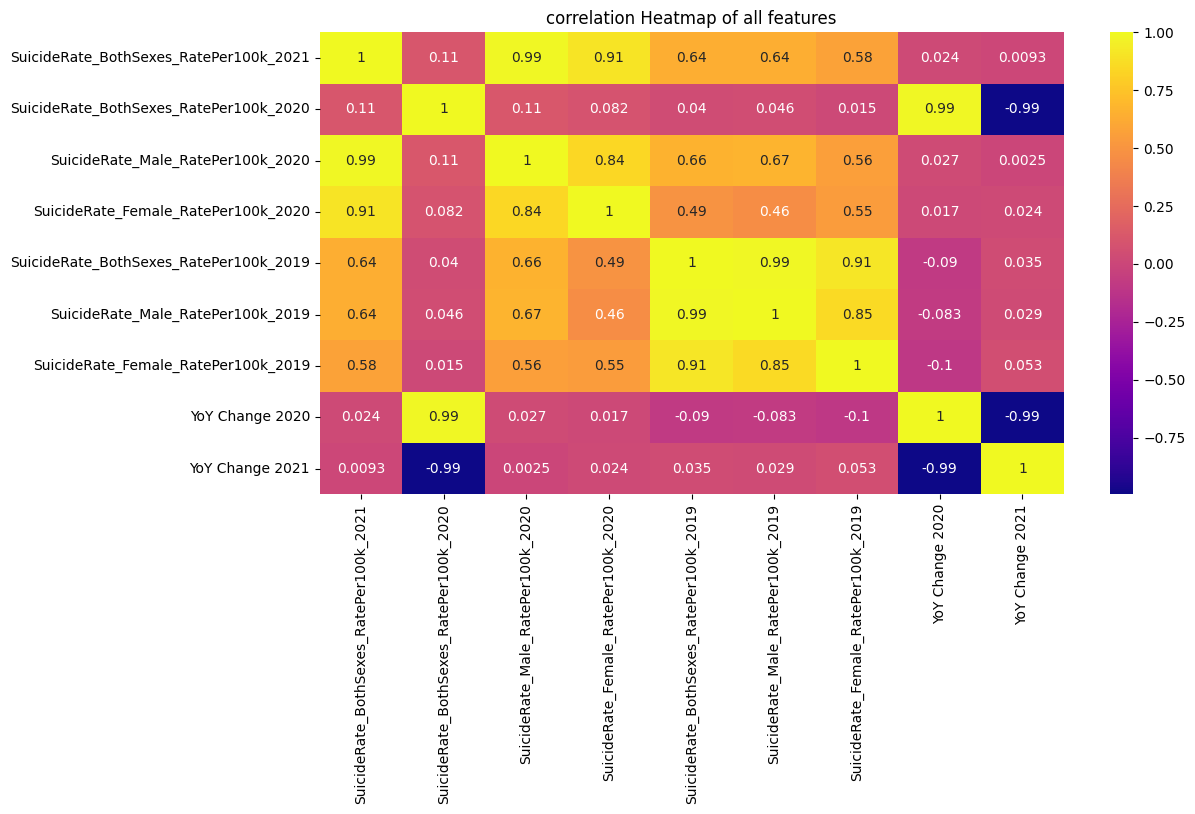

In [51]:
# correlation Heat map
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=('int64','float64')).corr(method='pearson'),annot=True,cmap='plasma')
plt.title('correlation Heatmap of all features')
plt.show()


 YOY change 2020 and YOY change 2021  are correlated as they have been derived using formulae in feature engineering

In [52]:
# Melt the dataframe to have a year and gender column
melted_df = pd.melt(df1, id_vars=['country'],
                    value_vars=['SuicideRate_BothSexes_RatePer100k_2021',
                                'SuicideRate_Male_RatePer100k_2021',
                                'SuicideRate_Female_RatePer100k_2021',
                                'SuicideRate_BothSexes_RatePer100k_2020',
                                'SuicideRate_Male_RatePer100k_2020',
                                'SuicideRate_Female_RatePer100k_2020',
                                'SuicideRate_BothSexes_RatePer100k_2019',
                                'SuicideRate_Male_RatePer100k_2019',
                                'SuicideRate_Female_RatePer100k_2019'],
                    var_name='Year_Gender', value_name='RatePer100k')

# Extract year and gender from the 'Year_Gender' column
melted_df['Year'] = melted_df['Year_Gender'].str.extract(r'(\d{4})')
melted_df['Gender'] = melted_df['Year_Gender'].str.extract(r'_(BothSexes|Male|Female)_')

# Drop the 'Year_Gender' column as it's no longer needed
melted_df = melted_df.drop(columns=['Year_Gender'])

melted_df.head()

,country,RatePer100k,Year,Gender
0,India,13.33,2021,BothSexes
1,China,9.17,2021,BothSexes
2,United States,15.25,2021,BothSexes
3,Indonesia,1.64,2021,BothSexes
4,Pakistan,5.82,2021,BothSexes


This is done for further analysis based on Gender

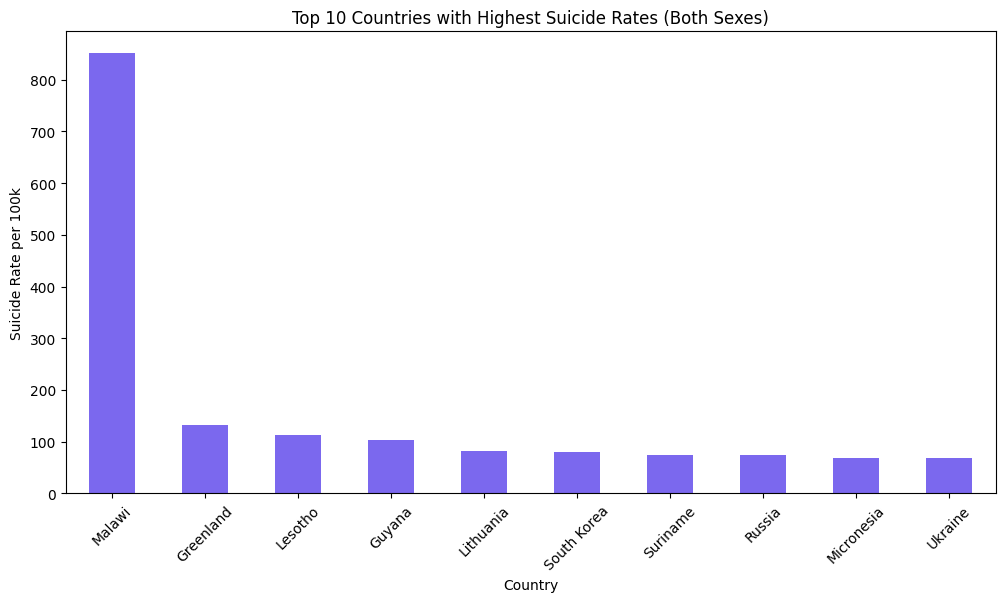

In [53]:
# Filter the data for BothSexes
both_sexes_df = melted_df[melted_df['Gender'] == 'BothSexes']

# Group by country and sum the rates
country_suicide_rates = both_sexes_df.groupby('country')['RatePer100k'].sum().sort_values(ascending=False)

# Plot the top 10 countries with the highest suicide rates
top_10_countries = country_suicide_rates.head(10)
top_10_countries.plot(kind='bar', figsize=(12, 6), color='mediumslateblue')
plt.title('Top 10 Countries with Highest Suicide Rates (Both Sexes)')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.show()

Suicide rate based on Both sexes

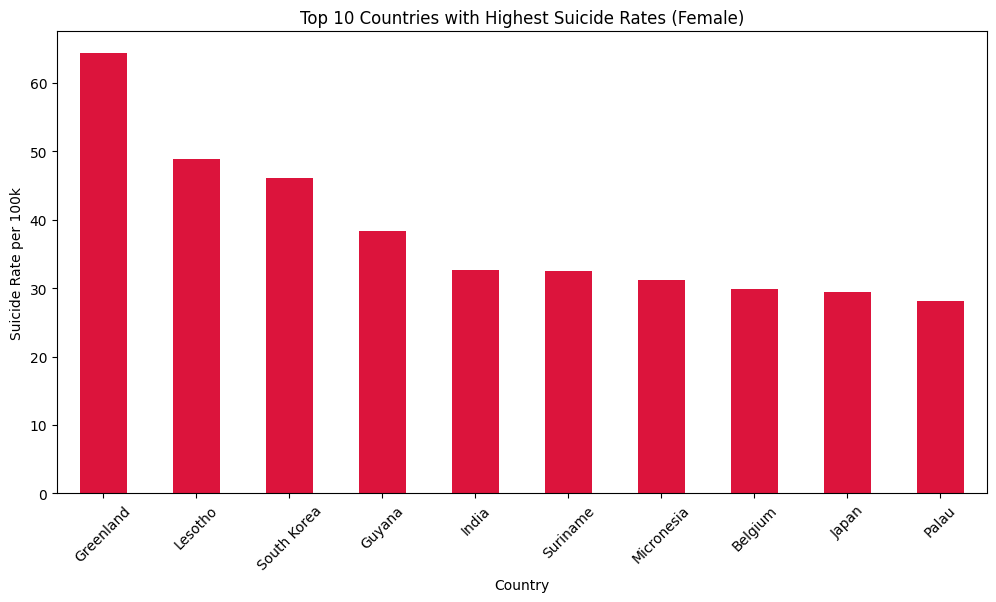

In [54]:

# Filter the data for BothSexes
Female_df = melted_df[melted_df['Gender'] == 'Female']

# Group by country and sum the rates
country_female_suicide_rates = Female_df.groupby('country')['RatePer100k'].sum().sort_values(ascending=False)

# Plot the top 10 countries with the highest suicide rates
top_10_countries_female = country_female_suicide_rates.head(10)
top_10_countries_female.plot(kind='bar', figsize=(12, 6), color='crimson')
plt.title('Top 10 Countries with Highest Suicide Rates (Female)')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.show()

Highest suicide Rate for female

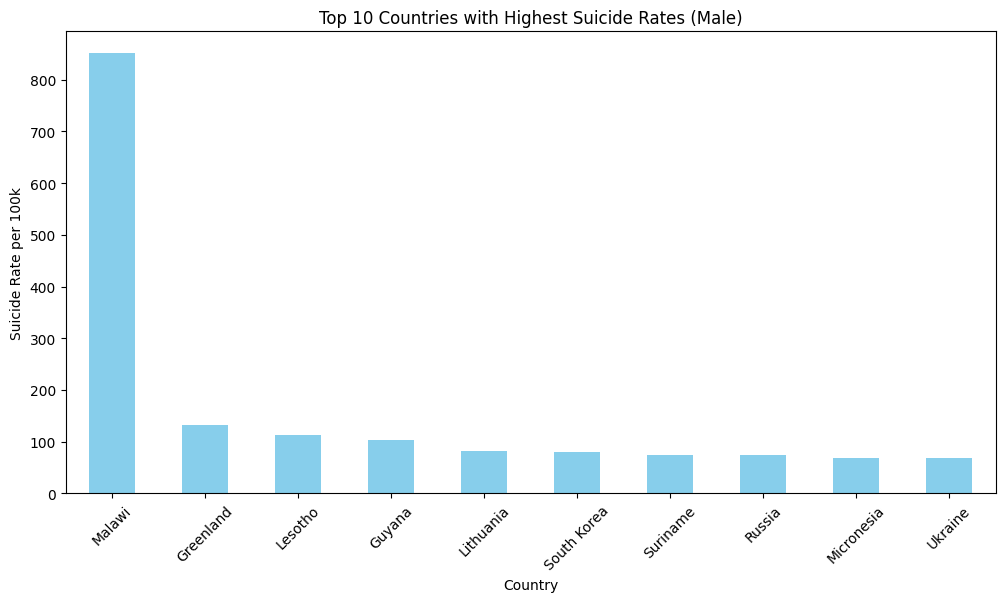

In [55]:
# Filter the data for BothSexes
male_df = melted_df[melted_df['Gender'] == 'Male']

# Group by country and sum the rates
country_male_suicide_rates = male_df.groupby('country')['RatePer100k'].sum().sort_values(ascending=False)

# Plot the top 10 countries with the highest suicide rates
top_10_countries_male = country_suicide_rates.head(10)
top_10_countries_male.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Top 10 Countries with Highest Suicide Rates (Male)')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.show()

Highest suicide rate for male

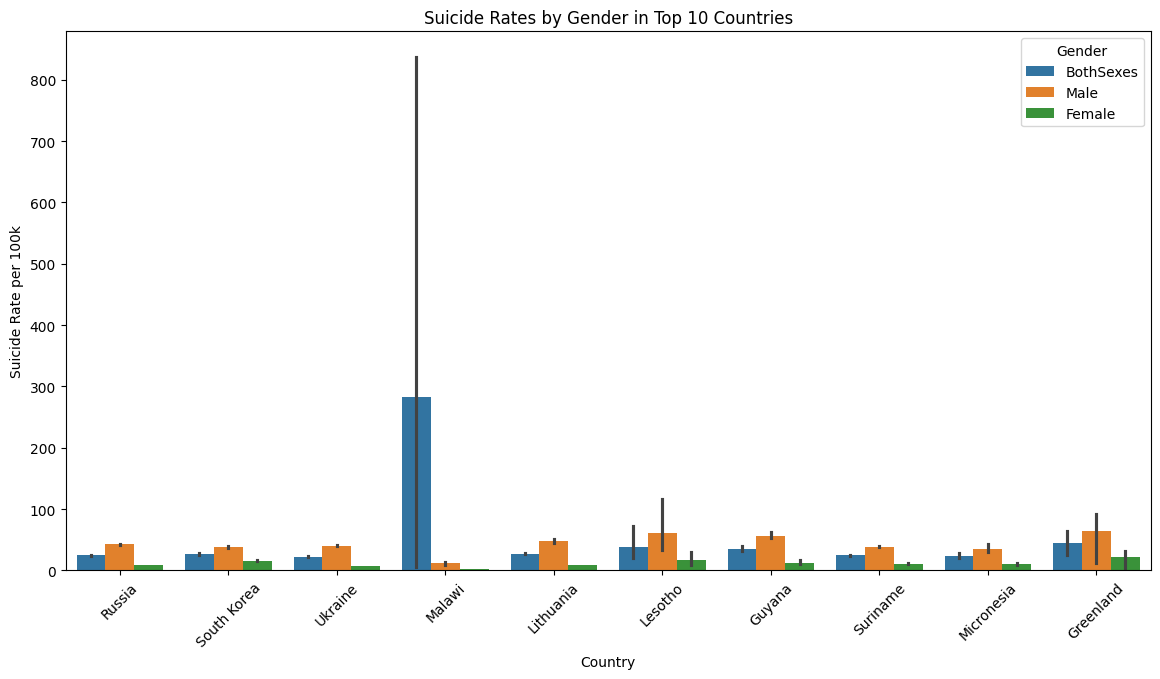

In [56]:
# Filter the data for the top 10 countries
top_10_countries_list = top_10_countries.index.tolist()
top_10_df = melted_df[melted_df['country'].isin(top_10_countries_list)]

# Create a grouped barplot
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_df, x='country', y='RatePer100k', hue='Gender')
plt.title('Suicide Rates by Gender in Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

comparative analysis all over gender and contry wise 

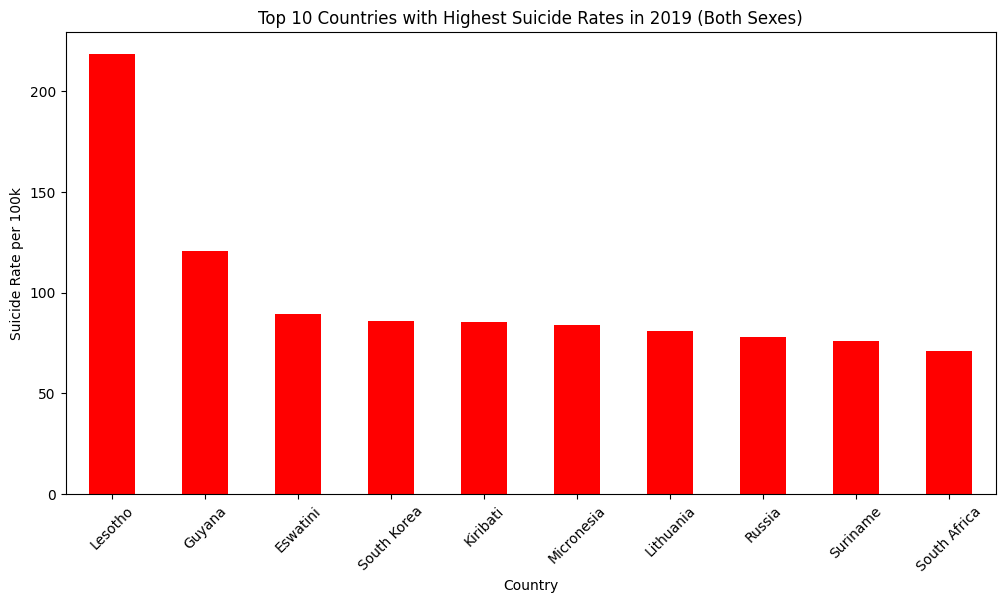

In [57]:
# Filter the data for the year 2019
year_2019_df = melted_df[melted_df['Year'] == '2019']

# Group by country and sum the rates
year_2019_country_suicide_rates = year_2019_df.groupby('country')['RatePer100k'].sum().sort_values(ascending=False)

# Plot the top 10 countries with the highest suicide rates for 2019
top_10_2019 = year_2019_country_suicide_rates.head(10)
top_10_2019.plot(kind='bar', figsize=(12, 6), color='red')
plt.title('Top 10 Countries with Highest Suicide Rates in 2019 (Both Sexes)')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.show()

Suicide Rates in 2019

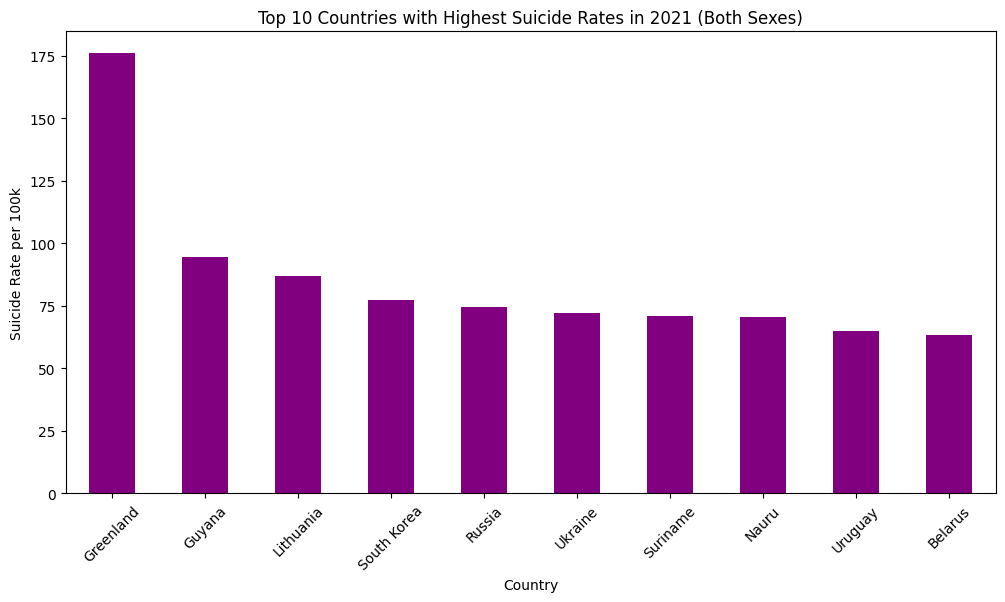

In [59]:
# Filter the data for the last year available
last_year = melted_df['Year'].max()
last_year_df = melted_df[melted_df['Year'] == last_year]

# Group by country and sum the rates
last_year_country_suicide_rates = last_year_df.groupby('country')['RatePer100k'].sum().sort_values(ascending=False)

# Plot the top 10 countries with the highest suicide rates for the last year
top_10_last_year = last_year_country_suicide_rates.head(10)
top_10_last_year.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title(f'Top 10 Countries with Highest Suicide Rates in {last_year} (Both Sexes)')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.show()

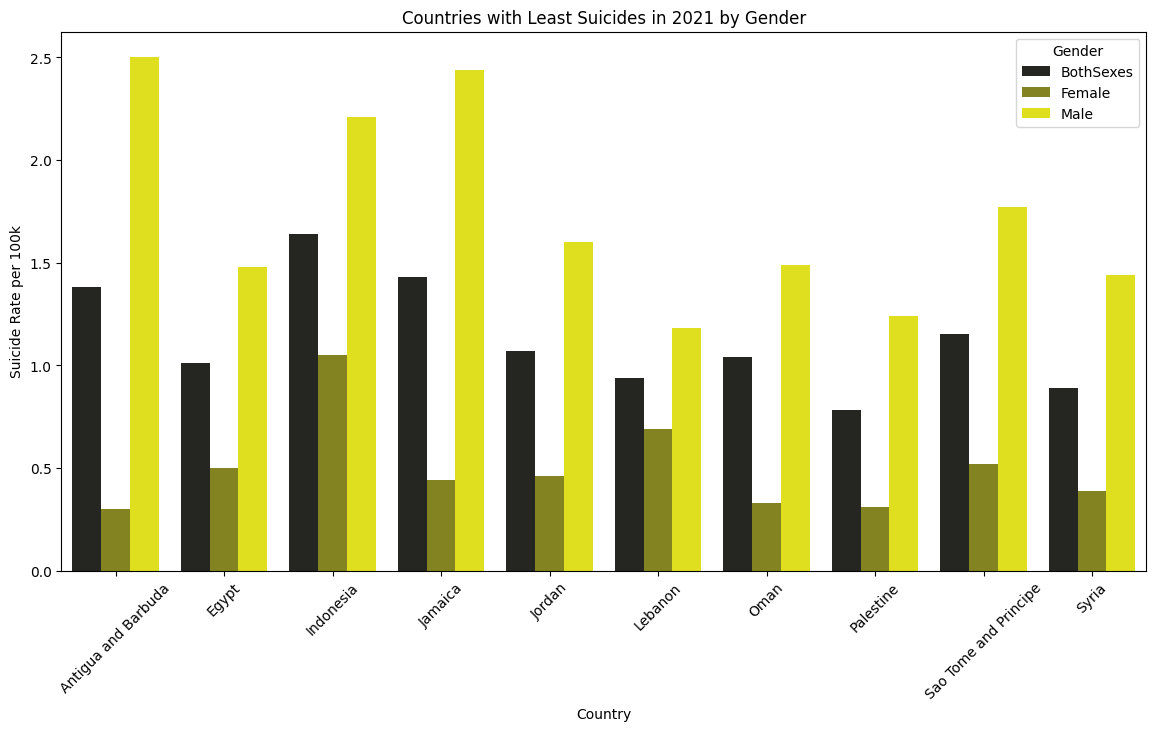

In [60]:
# Filter the data for the year 2021
year_2021_df = melted_df[melted_df['Year'] == '2021']

# Group by country and gender, and sum the rates
year_2021_country_gender_suicide_rates = year_2021_df.groupby(['country', 'Gender'])['RatePer100k'].sum().reset_index()

# Sort the data to get the countries with the least suicides
least_suicides_2021 = year_2021_country_gender_suicide_rates.groupby('country')['RatePer100k'].sum().sort_values().head(10).index.tolist()

# Filter the data for the least suicides countries
least_suicides_2021_df = year_2021_country_gender_suicide_rates[year_2021_country_gender_suicide_rates['country'].isin(least_suicides_2021)]

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(data=least_suicides_2021_df, x='country', y='RatePer100k', hue='Gender', color='yellow')
plt.title('Countries with Least Suicides in 2021 by Gender')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

<Axes: ylabel='SuicideRate_BothSexes_RatePer100k_2020'>

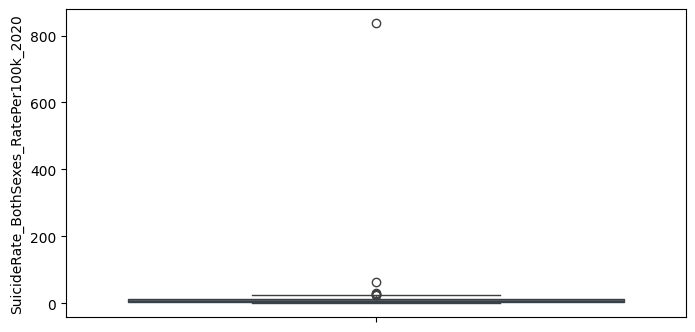

In [61]:
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['SuicideRate_BothSexes_RatePer100k_2020'])   # boxplot to show outliers in Age

In [62]:
# one outlier is present in AGE column

In [63]:
# checking outlier in all the columns
df_num=df.select_dtypes(include='number')
for i in df_num:
    q1=df_num[i].quantile(0.25)
    q3=df_num[i].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    if df_num[df_num[i]>upper].any(axis=None):
       df_num.loc[df[i]>upper,i]=upper

    if df_num[df_num[i]<lower].any(axis=None):
        df_num.loc[df[i]<lower,i]=lower

    else:
        print(i,'No')

SuicideRate_BothSexes_RatePer100k_2021 No
SuicideRate_BothSexes_RatePer100k_2020 No
SuicideRate_Male_RatePer100k_2020 No
SuicideRate_Female_RatePer100k_2020 No
SuicideRate_BothSexes_RatePer100k_2019 No
SuicideRate_Male_RatePer100k_2019 No
SuicideRate_Female_RatePer100k_2019 No


In [64]:
import numpy as np

df_num = df.select_dtypes(include='number').copy()  # Copy to avoid modifying original df

for i in df_num.columns:
    q1 = df_num[i].quantile(0.25)
    q3 = df_num[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # Detect outliers
    upper_outliers = df_num[i] > upper
    lower_outliers = df_num[i] < lower

    if upper_outliers.any() or lower_outliers.any():
        print(f"{i}: {upper_outliers.sum()} upper outliers, {lower_outliers.sum()} lower outliers")
        df_num[i] = np.where(df_num[i] > upper, upper, df_num[i])
        df_num[i] = np.where(df_num[i] < lower, lower, df_num[i])
    else:
        print(f"{i}: No outliers")


SuicideRate_BothSexes_RatePer100k_2021: 4 upper outliers, 0 lower outliers
SuicideRate_BothSexes_RatePer100k_2020: 6 upper outliers, 0 lower outliers
SuicideRate_Male_RatePer100k_2020: 6 upper outliers, 0 lower outliers
SuicideRate_Female_RatePer100k_2020: 5 upper outliers, 0 lower outliers
SuicideRate_BothSexes_RatePer100k_2019: 14 upper outliers, 0 lower outliers
SuicideRate_Male_RatePer100k_2019: 16 upper outliers, 0 lower outliers
SuicideRate_Female_RatePer100k_2019: 7 upper outliers, 0 lower outliers
YoY Change 2020: 16 upper outliers, 8 lower outliers
YoY Change 2021: 11 upper outliers, 24 lower outliers


# Step 3. Model Selection and Model Evaluation:

In [65]:
# Train Random Forest model
model1 = LinearRegression()
model1.fit(x_train_final, y_train)

# Model Evaluation
y_pred = model1.predict(x_test_final)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MAE: 0.3288883874904706
MSE: 0.36162345013109903
R-squared: 0.9950190141653368


#### R2 square of Linear Regression is  0.99

In [66]:
# Train  Decision tree model

from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(x_train_final, y_train)

# Model Evaluation
y_pred = model2.predict(x_test_final)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MAE: 1.1211290322580643
MSE: 21.693704838709674
R-squared: 0.7011918434387899


#### R2 square of   DecisionTreeRegrressor is 0.73

In [67]:
# training model Randomforest
from sklearn.ensemble import RandomForestRegressor
model3= RandomForestRegressor()
model3.fit(x_train_final, y_train)

# Model Evaluation
y_pred = model3.predict(x_test_final)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MAE: 0.989898387096773
MSE: 20.643503136612903
R-squared: 0.7156572764735858


## R2 square of Randomforest Regressor is 0.72

In [68]:
# Train  model
# supprt vector
from sklearn.svm import SVR
model4 = SVR()
model4.fit(x_train_final, y_train)

# Model Evaluation
y_pred = model4.predict(x_test_final)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")



MAE: 1.75306596254995
MSE: 41.296792185795404
R-squared: 0.43117976220870924


#### R2 square of support Vector Machine is  0.43

In [69]:
# Define the combined models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}


# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train_final, y_train)
    y_pred = model.predict(x_test_final)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Evaluation Metrics:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R-squared: {r2}\n")


Linear Regression Evaluation Metrics:
MAE: 0.3288883874904706
MSE: 0.36162345013109903
R-squared: 0.9950190141653368

Decision Tree Regressor Evaluation Metrics:
MAE: 1.0929032258064517
MSE: 21.673048387096767
R-squared: 0.7014763645140714

Random Forest Regressor Evaluation Metrics:
MAE: 0.9670145161290317
MSE: 19.889678105967747
R-squared: 0.7260404299944564

Support Vector Regressor Evaluation Metrics:
MAE: 1.75306596254995
MSE: 41.296792185795404
R-squared: 0.43117976220870924



#### Step 4:  Hyper parameter tuning

In [70]:
# Define parameter grids
param_grids = {
    "Linear Regression": {},
    "Decision Tree Regressor": {'max_depth': [5, 10, 15,30,50], 'min_samples_split': [2, 5, 10]},
    "Random Forest Regressor": {'n_estimators': [30,50, 100,150,200], 'max_depth': [10, 15], 'min_samples_split': [2, 5]},
    "Support Vector Regressor": {'C': [0.1, 1, 10,20,50], 'kernel': ['linear', 'rbf']}
}

# Initialize an empty dictionary for best models
best_models = {}

# Perform Grid Search for each model
for model_name, model_instance in models.items():
    param_grid = param_grids[model_name]
    if param_grid:
        grid_search = GridSearchCV(model_instance, param_grid, cv=10, scoring='r2', n_jobs=-1)
        grid_search.fit(x_train_final, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best Hyperparameters for {model_name}: {grid_search.best_params_}")
    else:
        model_instance.fit(x_train_final, y_train)
        best_models[model_name] = model_instance

# Evaluate models
for model_name, model in best_models.items():
    y_pred = model.predict(x_test_final)
    print(f"{model_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"R-squared: {r2_score(y_test, y_pred)}\n")


Best Hyperparameters for Decision Tree Regressor: {'max_depth': 30, 'min_samples_split': 5}
Best Hyperparameters for Random Forest Regressor: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 50}
Best Hyperparameters for Support Vector Regressor: {'C': 10, 'kernel': 'linear'}
Linear Regression Performance:
MAE: 0.3288883874904706
MSE: 0.36162345013109903
R-squared: 0.9950190141653368

Decision Tree Regressor Performance:
MAE: 1.081586021505376
MSE: 18.210182997311822
R-squared: 0.7491737233208948

Random Forest Regressor Performance:
MAE: 0.9743838709677417
MSE: 20.14169085741936
R-squared: 0.7225692172047993

Support Vector Regressor Performance:
MAE: 0.329253017259892
MSE: 0.3473205898253278
R-squared: 0.995216021147468



In [71]:
from sklearn.metrics import r2_score

# Define models with best parameters
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=30, min_samples_split=5),
    'Random Forest Regressor': RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=50),
    'Support Vector Regressor': SVR(C=10, kernel='linear')
}

# Train and evaluate each model
best_model = None
best_score = float('-inf')  # R-squared can be negative, so start with lowest possible value
best_model_name = ''

for name, model in models.items():
    model.fit(x_train_final, y_train)
    y_pred = model.predict(x_test_final)

    r2 = r2_score(y_test, y_pred)
    print(f"{name} R-squared: {r2:.4f}")

    # Select best model based on R-squared
    if r2 > best_score:
        best_score = r2
        best_model = model
        best_model_name = name

print(f"\nBest Selected Model based on R-squared: {best_model_name} with R² = {best_score:.4f}")


Linear Regression R-squared: 0.9950
Decision Tree Regressor R-squared: 0.7490
Random Forest Regressor R-squared: 0.7158
Support Vector Regressor R-squared: 0.9952

Best Selected Model based on R-squared: Support Vector Regressor with R² = 0.9952


#### Result:-  After Hyperparameter tuning accuracy of each model is improved .  Best model among all of these is Linear Regression whose accuracy has 99.99 % accuracy and best among other model preformance .

# Step 5. Deployment

In [72]:
# Save the model and preprocessing objects
joblib.dump(model, 'Suicide_Rates_Prediction.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoders.pkl')

print("Model trained and saved successfully.")


Model trained and saved successfully.


In [73]:
%%writefile appnew28.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load saved model and preprocessing objects
model = joblib.load('Suicide_Rates_Prediction.pkl')
scaler = joblib.load('scaler.pkl')
encoder = joblib.load('encoders.pkl')

# Load the original dataset (for country list)
df = pd.read_csv(r"C:\Users\shivam srivastava\Downloads\suicide-rate-by-country-2024.csv")

st.title("Suicide Rate Prediction for 2021")

# Collect user input
input_country = st.selectbox("Select Country", df['country'].unique())
input_2020_both = st.number_input("Both Sexes Rate (2020)", min_value=0.0)
input_2020_male = st.number_input("Male Rate (2020)", min_value=0.0)
input_2020_female = st.number_input("Female Rate (2020)", min_value=0.0)
input_2019_both = st.number_input("Both Sexes Rate (2019)", min_value=0.0)
input_2019_male = st.number_input("Male Rate (2019)", min_value=0.0)
input_2019_female = st.number_input("Female Rate (2019)", min_value=0.0)

if st.button("Predict Suicide Rate for 2021"):
    # Step 1: Build dataframe
    input_df = pd.DataFrame([{
        'country': input_country,
        'SuicideRate_BothSexes_RatePer100k_2020': input_2020_both,
        'SuicideRate_Male_RatePer100k_2020': input_2020_male,
        'SuicideRate_Female_RatePer100k_2020': input_2020_female,
        'SuicideRate_BothSexes_RatePer100k_2019': input_2019_both,
        'SuicideRate_Male_RatePer100k_2019': input_2019_male,
        'SuicideRate_Female_RatePer100k_2019': input_2019_female
    }])

    # Step 2: Feature Engineering
    input_df['YoY Change 2020'] = input_df['SuicideRate_BothSexes_RatePer100k_2020'] - input_df['SuicideRate_BothSexes_RatePer100k_2019']
    input_df['YoY Change 2021'] = 0  # Placeholder (you can drop if not needed)

    # Step 3: Transform columns
    cat_cols = ['country']
    num_cols = [col for col in input_df.columns if col not in cat_cols]

    # Preprocess input
    encoded_cat = encoder.transform(input_df[cat_cols])  # Remove .toarray()
    scaled_num = scaler.transform(input_df[num_cols])

    final_input = np.concatenate([scaled_num, encoded_cat], axis=1)

    # Step 4: Predict
    prediction = model.predict(final_input)
    st.success(f"Predicted Suicide Rate for 2021: {prediction[0]:.2f} per 100k population")


Overwriting appnew28.py


 # Run Streamlit in the background

In [ ]:
# Run Streamlit in the background  for jupiter notebook
! streamlit run appnew28.py & npx localtunnel --port 8501